# ResNet-56 on CIFAR10 (Accuracy, Implicit Model Calibration)

### Imports and Setup

In [1]:
# PyTorch and Models
import torch
from architectures.ResNet56 import resnet56

# Helper functions
import datasets.datasets as datasets
from util.common import *

In [2]:
# Make PyTorch deterministic
torch.manual_seed(0)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Load Data, Training and Test Sets

In [3]:
# Loading dataset into training and test data
training_loader = datasets.cifar10_training_loader()
test_loader = datasets.cifar10_test_loader()

Files already downloaded and verified
Files already downloaded and verified


Files already downloaded and verified


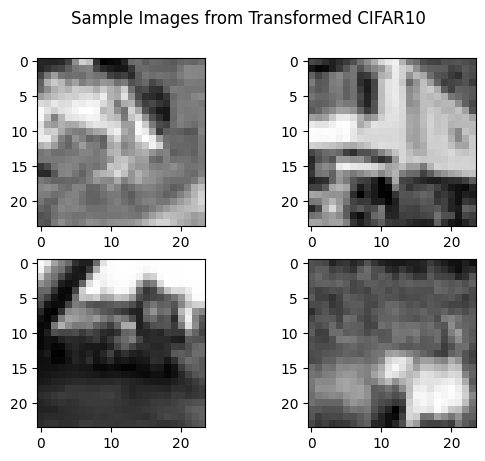

In [4]:
# Some sample images from the dataset
show_images (datasets.cifar10_training_dataset(), 4, 'Sample Images from Transformed CIFAR10')

### Training with Different Label Smoothing Constants

In [ ]:
model_Smooth_005 = resnet56(num_classes=10, cifar100=False)
model_Smooth_005.train_model(device, training_loader, test_loader, 0.05, NUM_EPOCHS_RESNET_56)

torch.save(model_Smooth_005.state_dict(), "models/ResNet56_CIFAR10_Accuracy_IMC/ResNet_Smooth_Labels_005_CIFAR10.pt")

In [ ]:
model_Smooth_01 = resnet56(num_classes=10, cifar100=False)
model_Smooth_01.train_model(device, training_loader, test_loader, 0.1, NUM_EPOCHS_RESNET_56)

torch.save(model_Smooth_01.state_dict(), "models/ResNet56_CIFAR10_Accuracy_IMC/ResNet_Smooth_Labels_01_CIFAR10.pt")

### Accuracy and Reliabity

In [4]:
# Temperature for temperature scaling
temperature = 3.1

model_Hard = resnet56(num_classes=10, cifar100=False)
model_Hard.load_state_dict(torch.load("models/ResNet56_CIFAR10_Accuracy_IMC/ResNet_Hard_Labels_CIFAR10.pt",map_location=device))
model_Hard.to(device)

# Compute Accuracy and Reliability
print(f"Accuarcy for ResNet w. Hard Labels: {compute_accuracy(model_Hard, test_loader, device).item():.2f}%")
rel_bins_Hard = bin_reliability(model_Hard, test_loader, device, NUM_BINS)
rel_bins_Temperature = bin_reliability(model_Hard, test_loader, device, NUM_BINS, temperature)

Accuarcy for ResNet w. Hard Labels: 93.59%


In [5]:
model_Smooth_05 = resnet56(num_classes=10, cifar100=False)
model_Smooth_05.load_state_dict(torch.load("models/ResNet56_CIFAR10_Accuracy_IMC/ResNet_Smooth_Labels_005_CIFAR10.pt",map_location=device))
model_Smooth_05.to(device)

# Compute Accuracy and Reliability
print(f"Accuarcy for ResNet w. Smooth Labels (alpha = 0.05): {compute_accuracy(model_Smooth_05, test_loader, device).item():.2f}%")
rel_bins_Smooth = bin_reliability(model_Smooth_05, test_loader, device, NUM_BINS)

Accuarcy for ResNet w. Smooth Labels (alpha = 0.05): 93.62%


In [6]:
model_Smooth_1 = resnet56(num_classes=10, cifar100=False)
model_Smooth_1.load_state_dict(torch.load("models/ResNet56_CIFAR10_Accuracy_IMC/ResNet_Smooth_Labels_01_CIFAR10.pt",map_location=device))
model_Smooth_1.to(device)

# Compute Accuracy and Reliability
print(f"Accuarcy for ResNet w. Smooth Labels (alpha = 0.1): {compute_accuracy(model_Smooth_1, test_loader, device).item():.2f}%")
rel_bins_Smooth_2 = bin_reliability(model_Smooth_1, test_loader, device, NUM_BINS)

Accuarcy for ResNet w. Smooth Labels (alpha = 0.1): 93.33%


In [7]:
model_Smooth_15 = resnet56(num_classes=10, cifar100=False)
model_Smooth_15.load_state_dict(torch.load("models/ResNet56_CIFAR10_Accuracy_IMC/ResNet_Smooth_Labels_015_CIFAR10.pt",map_location=device))
model_Smooth_15.to(device)

# Compute Accuracy and Reliability
print(f"Accuarcy for ResNet w. Smooth Labels (alpha = 0.15): {compute_accuracy(model_Smooth_15, test_loader, device).item():.2f}%")
rel_bins_Smooth_3 = bin_reliability(model_Smooth_15, test_loader, device, NUM_BINS)

Accuarcy for ResNet w. Smooth Labels (alpha = 0.15): 93.55%


In [8]:
model_Smooth_3 = resnet56(num_classes=10, cifar100=False)
model_Smooth_3.load_state_dict(torch.load("models/ResNet56_CIFAR10_Accuracy_IMC/ResNet_Smooth_Labels_03_CIFAR10.pt",map_location=device))
model_Smooth_3.to(device)

# Compute Accuracy and Reliability
print(f"Accuarcy for ResNet w. Smooth Labels (alpha = 0.3): {compute_accuracy(model_Smooth_3, test_loader, device).item():.2f}%")
rel_bins_Smooth_4 = bin_reliability(model_Smooth_3, test_loader, device, NUM_BINS)

Accuarcy for ResNet w. Smooth Labels (alpha = 0.3): 93.53%


#### Compute ECE Score

In [9]:
print(f"ECE w. Hard Labels: {calculate_ece(rel_bins_Hard):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.05): {calculate_ece(rel_bins_Smooth):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.1): {calculate_ece(rel_bins_Smooth_2):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.15): {calculate_ece(rel_bins_Smooth_3):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.3): {calculate_ece(rel_bins_Smooth_4):.4f}")
print(f"ECE w. Temperature Scaling: {calculate_ece(rel_bins_Temperature):.4f}")

ECE w. Hard Labels: 0.0490
ECE w. Smooth Labels (alpha = 0.05): 0.0282
ECE w. Smooth Labels (alpha = 0.1): 0.0647
ECE w. Smooth Labels (alpha = 0.15): 0.1022
ECE w. Smooth Labels (alpha = 0.3): 0.2221
ECE w. Temperature Scaling: 0.0060


#### Plot Reliability Diagram

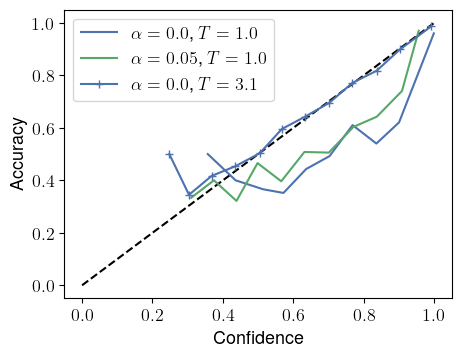

In [10]:
fig = plot_reliability(rel_bins_Hard, rel_bins_Smooth, rel_bins_Temperature, temperature, 0.05)
fig.savefig(format="pdf", fname="figures/reliability_resnet_cifar10.pdf",bbox_inches='tight')